In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
req_train = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'HalfBath', 'GarageArea', 'BsmtFullBath', 'BsmtHalfBath']
X=data[req_train]
target_train="SalePrice"
y=data[target_train]

In [44]:
X=X.fillna(X.mean())

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
train_data = X_train.join(y_train)


array([[<Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'FullBath'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>],
       [<Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'SalePrice'}>, <Axes: >]], dtype=object)

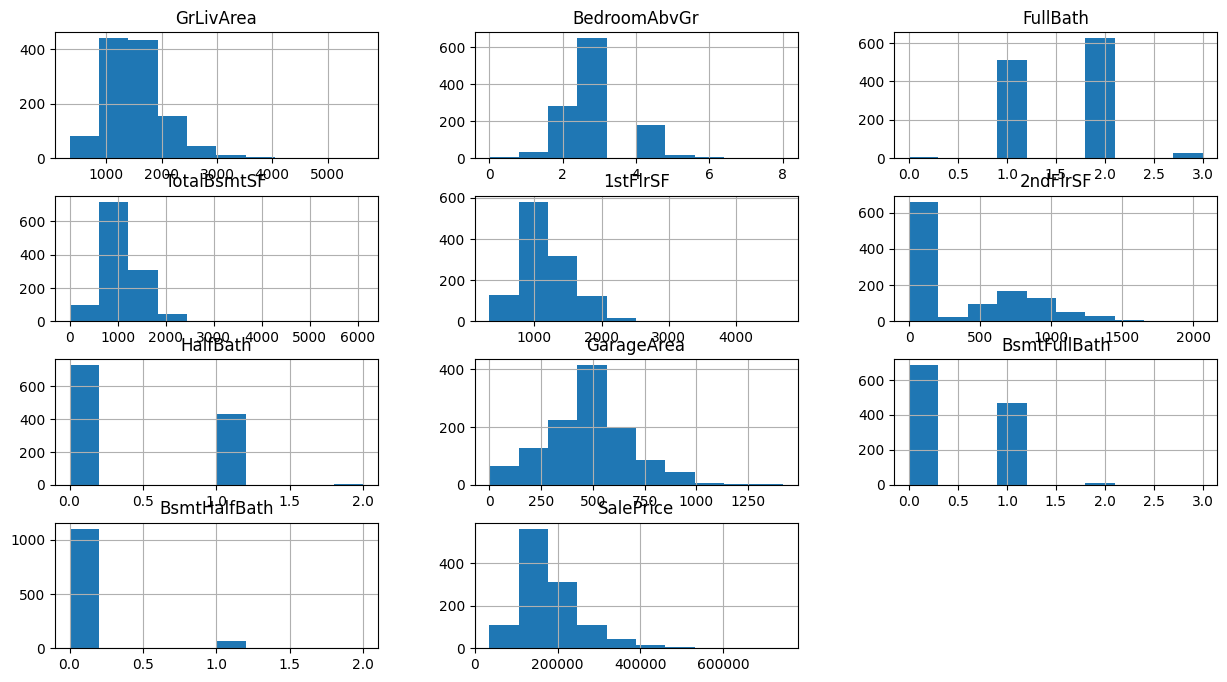

In [46]:

train_data.hist(figsize=(15,8))

<Axes: >

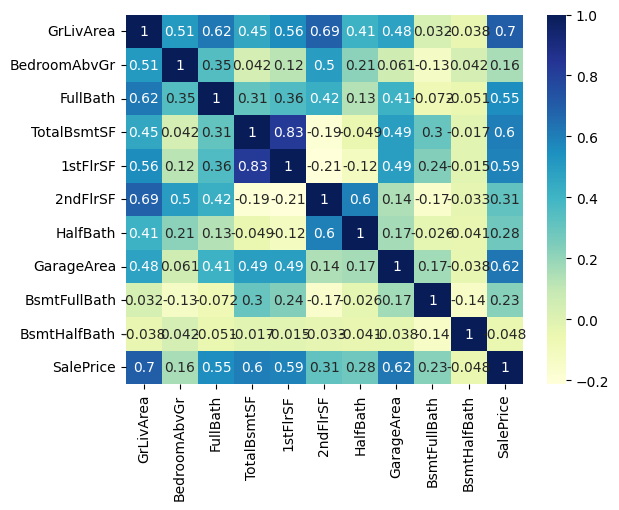

In [47]:
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [48]:
from sklearn.linear_model import LinearRegression
Reg = LinearRegression()
Reg.fit(X_train,y_train)
y_pred = Reg.predict(X_test)
from sklearn import metrics
metr = metrics.mean_squared_error(y_test, y_pred)

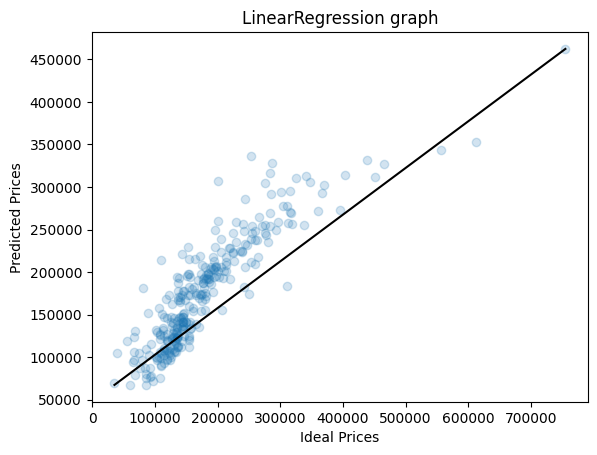

In [49]:
plt.scatter(y_test,y_pred,alpha=0.2)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='black')
plt.xlabel("Ideal Prices")
plt.ylabel("Predicted Prices")
plt.title("LinearRegression graph")
plt.show()

In [50]:
data_tst = pd.read_csv("test.csv")
req_test = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'HalfBath', 'GarageArea', 'BsmtFullBath', 'BsmtHalfBath']
X_test = data_tst[req_test]
X_test = X_test.fillna(X_test.mean())
pred = Reg.predict(X_test)
ID = data_tst.loc[:,"Id"]
y_test = pd.DataFrame({"Id":ID,"SalePrice":pred})
print(y_test)

        Id      SalePrice
0     1461  140335.464990
1     1462  153708.789284
2     1463  194768.454831
3     1464  192249.865931
4     1465  188356.121005
...    ...            ...
1454  2915   83143.861470
1455  2916  105440.828698
1456  2917  150034.054549
1457  2918   79853.629462
1458  2919  232924.968359

[1459 rows x 2 columns]
